# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento dos dados

In [2]:
df = pd.read_csv('fraud_dataset_example.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Análise superficial dos dads

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


# Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [5]:
ohe = OneHotEncoder().fit(df[['type']])
type_ohe = ohe.transform(df[['type']]).toarray()

In [6]:
ohe.get_feature_names_out()

array(['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'], dtype=object)

In [7]:
df = df.drop(columns=['type', 'nameOrig', 'nameDest'])
df[ohe.get_feature_names_out()] = type_ohe
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0


In [8]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [9]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= SEED)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [12]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


Próxima tafera:

<s>Realizar balanceamento de dados</s>


# Balanceamento de dados

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE(random_state=SEED)

In [18]:
X_balanceado, y_balanceado = smote.fit_resample(X, y)

In [19]:
X_balanceado

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0.0,0.00000,0.0,1.0,0.00000
1,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0.0,0.00000,0.0,1.0,0.00000
2,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0.0,0.00000,0.0,0.0,1.00000
3,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,0.0,1.00000,0.0,0.0,0.00000
4,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0.0,0.00000,0.0,1.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0.0,0.00000,0.0,0.0,1.00000
202990,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0.0,0.00000,0.0,0.0,1.00000
202991,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0.0,0.19269,0.0,0.0,0.80731
202992,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0.0,0.00000,0.0,0.0,1.00000


In [20]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.25, random_state= SEED)

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


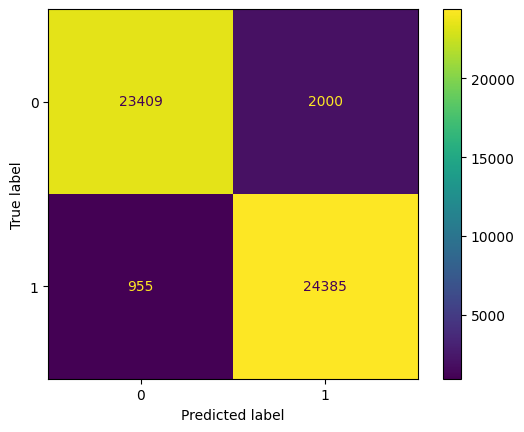

In [28]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred)).plot()


# Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.25, random_state= SEED)

dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906


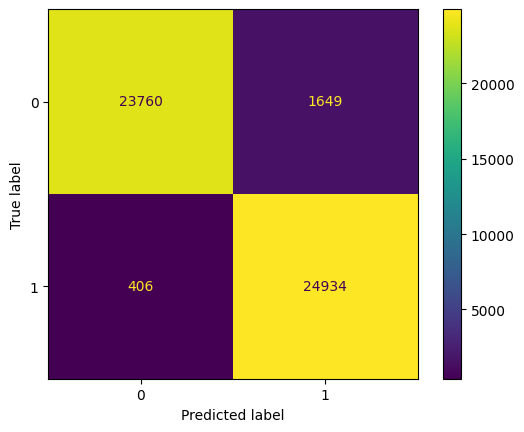

In [31]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred)).plot()


# Random Florest

In [32]:
from sklearn.ensemble import RandomForestClassifier

Acurácia: 0.9695166407219846
Precisão: 0.980569581902646
Recall: 0.9579321231254933
F1: 0.9691186745184149


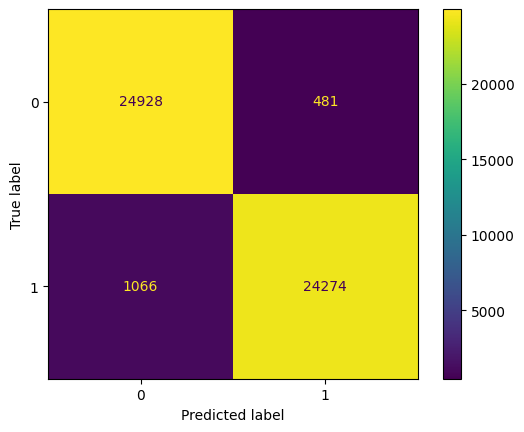

In [33]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.25, random_state= SEED)

rand_florest = RandomForestClassifier(max_depth=5, random_state=SEED)
rand_florest.fit(X_train, y_train)
y_pred = rand_florest.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred)).plot()

# Análise de métricas

In [35]:
classficadores=[
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth=5, random_state=SEED),
]

In [39]:
for i in classficadores:
    i.fit(X_train, y_train)
    name = i.__class__.__name__
    print("=" *30)
    print(name)
    y_pred = i.predict(X_test)
    print("-" *30)
    print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
    print("Precisão:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred)) 
    print("F1:",metrics.f1_score(y_test, y_pred))

LogisticRegression
------------------------------
Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
------------------------------
Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906
RandomForestClassifier
------------------------------
Acurácia: 0.9695166407219846
Precisão: 0.980569581902646
Recall: 0.9579321231254933
F1: 0.9691186745184149
